In [5]:
from google_dataset import create_google_dataloaders

BATCH_SIZE = 16
NSAMPLES = 5
# DIRECTORY = '../../datasets/converted_gwfonts/'

DIRECTORY = 'E:/google_fonts/converted'

train_loader, test_loader = create_google_dataloaders(nsamples=NSAMPLES, batch_size=BATCH_SIZE, dataset_lens=(120000, 16000), directory=DIRECTORY)


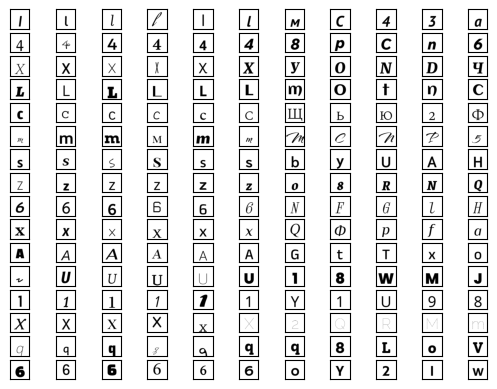

In [7]:
import matplotlib.pyplot as plt
from itertools import product

import torch

for (content_b, style_b), target_b in train_loader:

    _, sps = plt.subplots(BATCH_SIZE, NSAMPLES * 2 + 1)


    for i, j in product(range(BATCH_SIZE), range(NSAMPLES * 2 + 1)):
        sps[i, j].set_xticks([])
        sps[i, j].set_yticks([])
    for i in range(BATCH_SIZE):

        for j in range(NSAMPLES):
            sps[i, j].imshow(content_b[i][j].permute(1, 2, 0), cmap='gray')
        sps[i, NSAMPLES].imshow(target_b[i].permute(1, 2, 0), cmap='gray')

        for j in range(NSAMPLES):
            sps[i, j + NSAMPLES + 1].imshow(style_b[i][j].permute(1, 2, 0), cmap='gray')

    break

# print(batches)


In [3]:
from model import SeparatingStyleAndContent as Model
from model import separating_style_and_content_loss as loss_fn
from model import simple_l1_loss as simple_loss

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(NSAMPLES).to(DEVICE)
optimizer = torch.optim.Adam(lr=0.02, params=model.parameters())
print(DEVICE)

cpu


In [4]:
from test_train_loop import train_test_routine

Epoch 6: test:   0%|          | 0/1 [00:01<?, ?it/s]


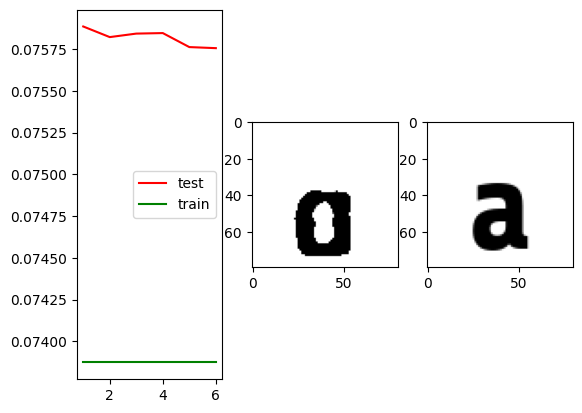

In [5]:
train_losses, test_losses = train_test_routine(model=model, optimizer=optimizer, lossfn=simple_loss, testloader=test_loader, trainloader=train_loader, device=DEVICE, epochs=6, save_each=2, start_from_saved_state=True)

In [6]:
train_losses, test_losses

([0.07387268188703419,
  0.07387268188703418,
  0.07387268188703458,
  0.07387268188703418,
  0.07387268188703439,
  0.07387268188703454],
 [0.07588602030393876,
  0.07582237831064123,
  0.07584334747180865,
  0.07584644256086247,
  0.07576255400206816,
  0.07575615861158033])